In [ ]:
# Introducción
#### 0.1.1 - 2025 - 09 - 01
#### Dr. Marco Aceves
#### rev en Jupyter Notebook
#### Código como ejemplo como parte del libro:
#### de 0 a 100 en Inteligencia Artificial
#### 7_Bagging

In [2]:
#Definir las librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
def load_and_split_data():
    """Carga el dataset Iris y lo divide en conjuntos de entrenamiento y prueba."""
    iris = load_iris()
    X, y = iris.data[:, :2], iris.target  # Solo largo y ancho del sépalo
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

def train_models(X_train, y_train):
    """Entrena un árbol de decisión simple, un modelo Bagging, Boosting y Stacking."""
    tree_classifier = DecisionTreeClassifier(random_state=42)
    bagging_classifier = BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        n_estimators=25,
        random_state=42
    )
    boosting_classifier = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=50,
        random_state=42
    )

    estimators = [
        ("dt", DecisionTreeClassifier(random_state=42)),
        ("bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=10, random_state=42))
    ]
    stacking_classifier = StackingClassifier(
        estimators=estimators,
        final_estimator=LogisticRegression(random_state=42),
        cv=5
    )

    tree_classifier.fit(X_train, y_train)
    bagging_classifier.fit(X_train, y_train)
    boosting_classifier.fit(X_train, y_train)
    stacking_classifier.fit(X_train, y_train)

    return tree_classifier, bagging_classifier, boosting_classifier, stacking_classifier

def plot_decision_boundary(model, X, y, title, ax):
    """Grafica las fronteras de decisión de un modelo."""
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    ax.set_title(title)
    ax.set_xlabel("Longitud del sépalo")
    ax.set_ylabel("Ancho del sépalo")

In [4]:
#Evaluación del modelo
def evaluate_models(tree_classifier, bagging_classifier, boosting_classifier, stacking_classifier, X_test, y_test):
    """Evalúa la precisión de los modelos y la imprime."""
    y_pred_tree = tree_classifier.predict(X_test)
    y_pred_bagging = bagging_classifier.predict(X_test)
    y_pred_boosting = boosting_classifier.predict(X_test)
    y_pred_stacking = stacking_classifier.predict(X_test)

    accuracy_tree = accuracy_score(y_test, y_pred_tree)
    accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
    accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
    accuracy_stacking = accuracy_score(y_test, y_pred_stacking)

    print("Precisión Árbol único:", accuracy_tree)
    print("Precisión Bagging:", accuracy_bagging)
    print("Precisión Boosting:", accuracy_boosting)
    print("Precisión Stacking:", accuracy_stacking)

    return {
        "Árbol único": accuracy_tree,
        "Bagging": accuracy_bagging,
        "Boosting": accuracy_boosting,
        "Stacking": accuracy_stacking
    }

def plot_accuracy_comparison(accuracies):
    """Grafica la comparación de precisión de los modelos."""
    models = list(accuracies.keys())
    scores = list(accuracies.values())

    plt.figure(figsize=(10, 6))
    plt.bar(models, scores, color=["skyblue", "lightcoral", "lightgreen", "gold"])
    plt.xlabel("Modelo")
    plt.ylabel("Precisión")
    plt.title("Comparación de Precisión de Modelos")
    plt.ylim(0, 1) # Asegura que el eje Y vaya de 0 a 1
    for i, score in enumerate(scores):
        plt.text(i, score + 0.02, f"{score:.2f}", ha='center')
    plt.tight_layout()
    plt.savefig("accuracy_comparison.png")



Precisión Árbol único: 0.6666666666666666
Precisión Bagging: 0.7111111111111111
Precisión Boosting: 0.8
Precisión Stacking: 0.7111111111111111


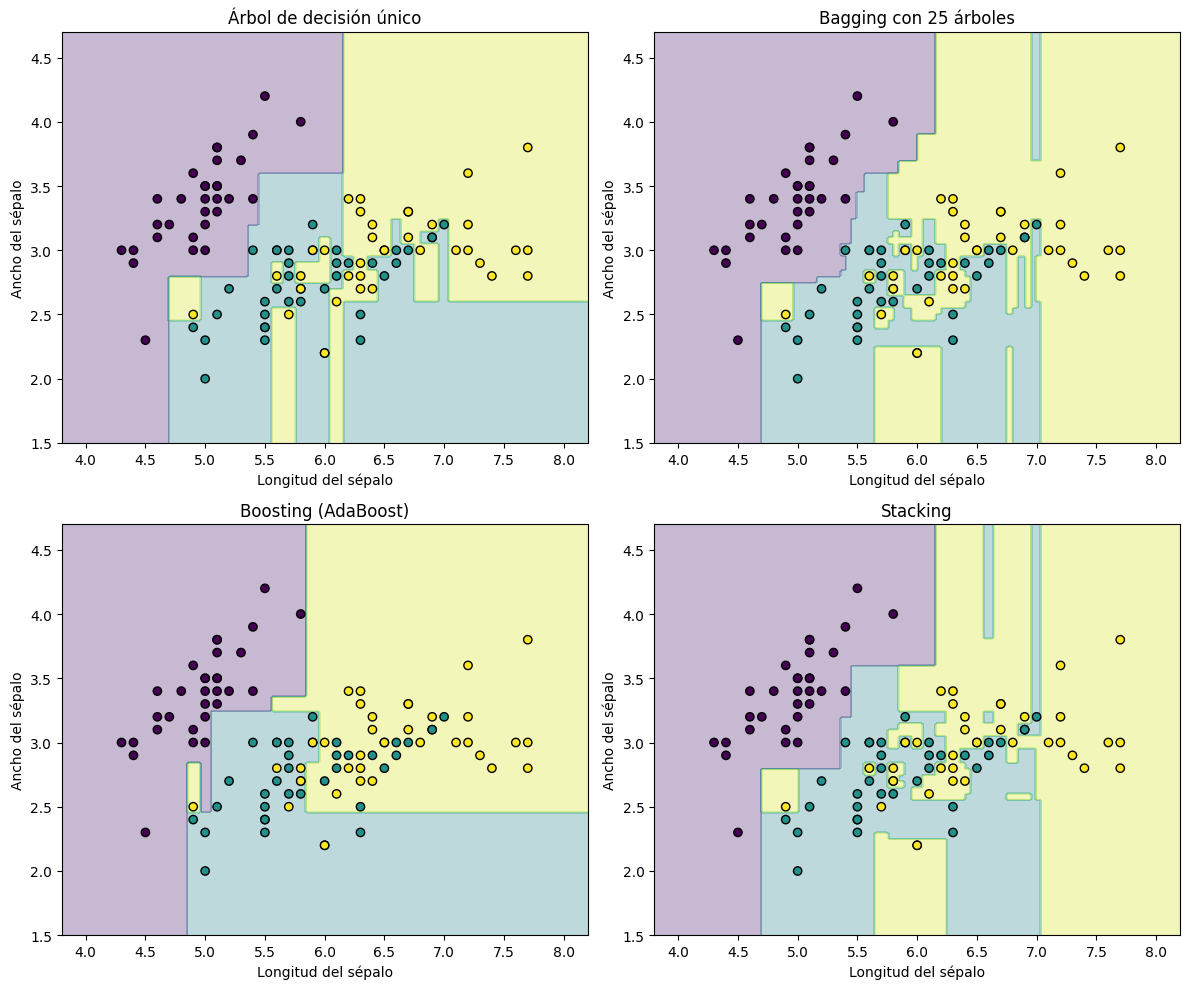

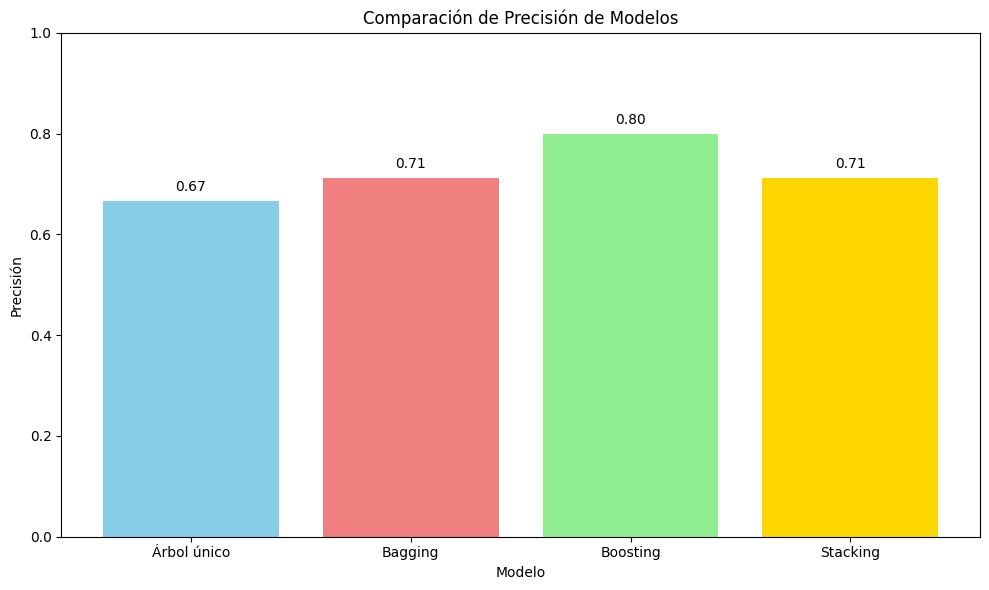

In [5]:
if __name__ == "__main__":
    # Se Cargan los datos
    X_train, X_test, y_train, y_test = load_and_split_data()

    # Entrenar los modelos
    tree_classifier, bagging_classifier, boosting_classifier, stacking_classifier = train_models(X_train, y_train)

    # 3. Comparación visual de fronteras de decisión
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()

    plot_decision_boundary(tree_classifier, X_train, y_train, "Árbol de decisión único", axes[0])
    plot_decision_boundary(bagging_classifier, X_train, y_train, "Bagging con 25 árboles", axes[1])
    plot_decision_boundary(boosting_classifier, X_train, y_train, "Boosting (AdaBoost)", axes[2])
    plot_decision_boundary(stacking_classifier, X_train, y_train, "Stacking", axes[3])

    plt.tight_layout()
    plt.savefig("decision_boundaries.png")

    # 4. Comparar precisión
    accuracies = evaluate_models(tree_classifier, bagging_classifier, boosting_classifier, stacking_classifier, X_test, y_test)

    # 5. Generar gráfico de comparación de precisión
    plot_accuracy_comparison(accuracies)